Saving apps.csv to apps (5).csv
Saving user_reviews.csv to user_reviews (5).csv


<ipython-input-7-8204003ee33c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_count.index, y=category_count.values, palette='viridis')


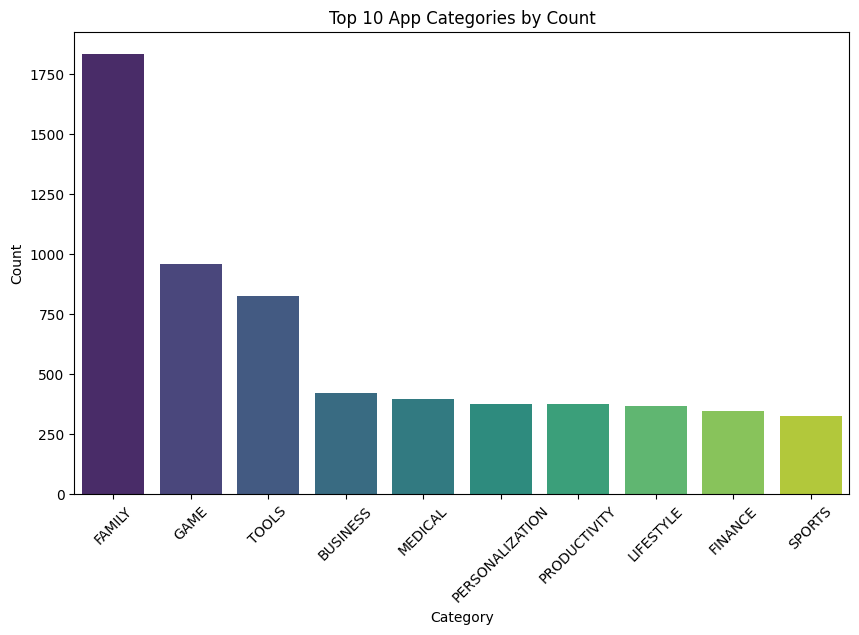

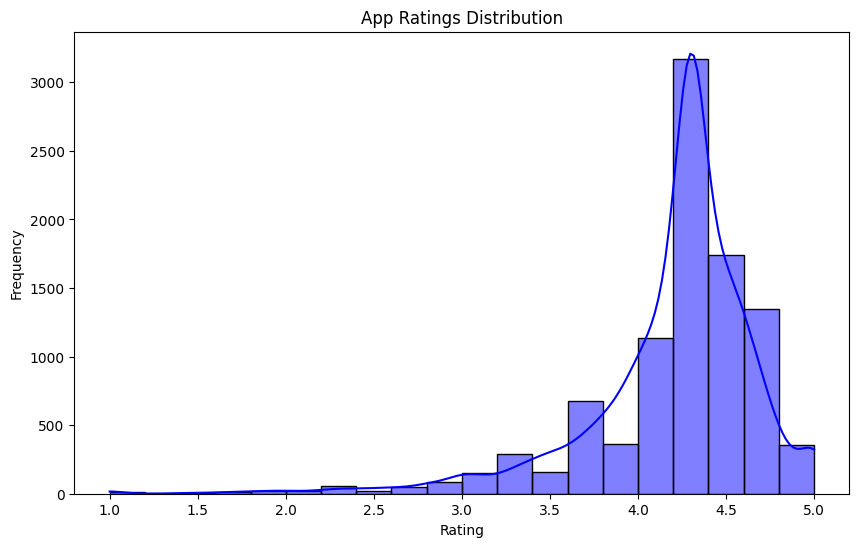

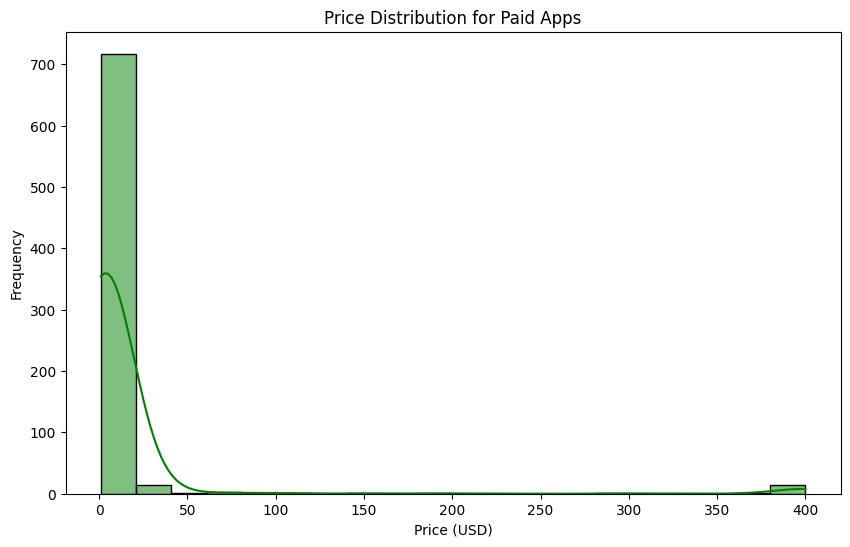

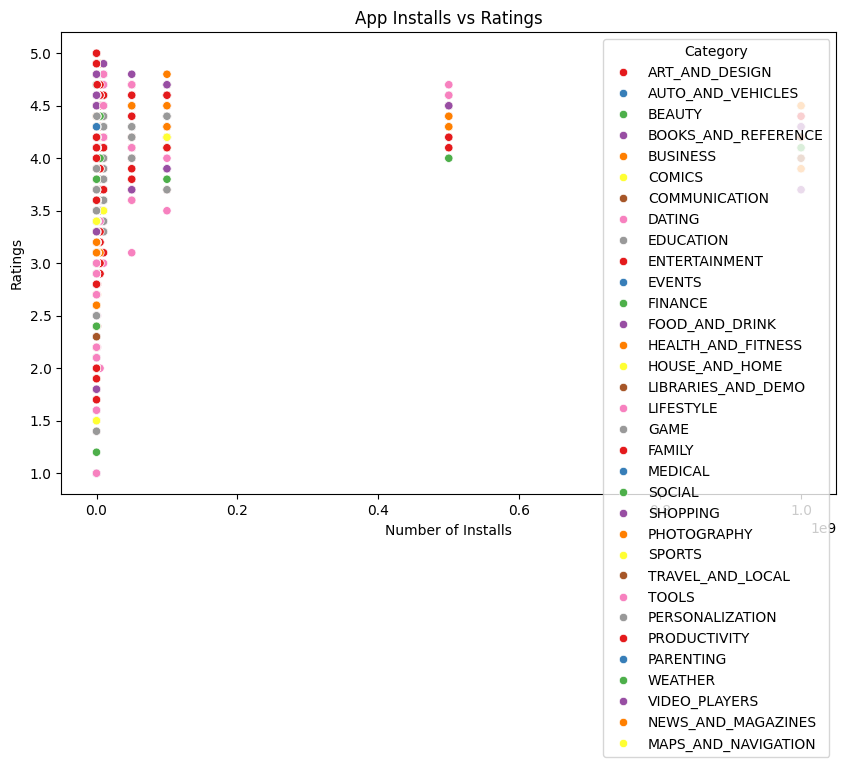

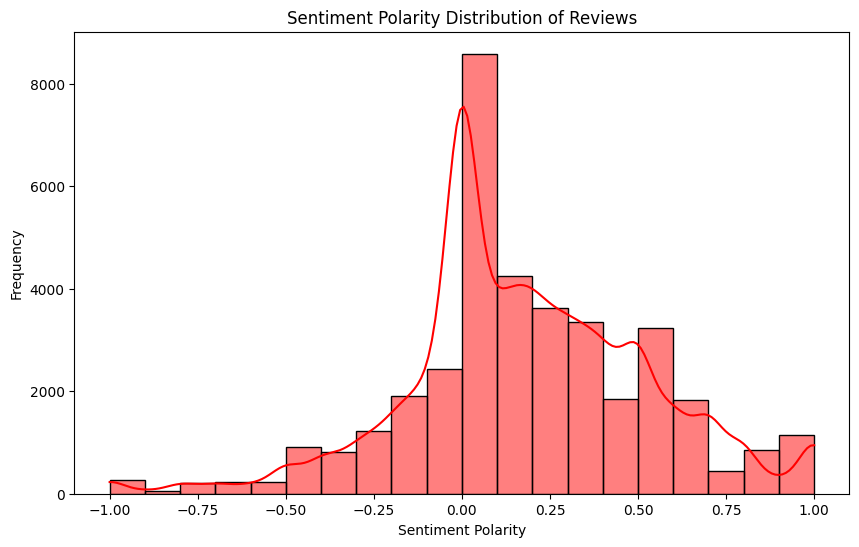

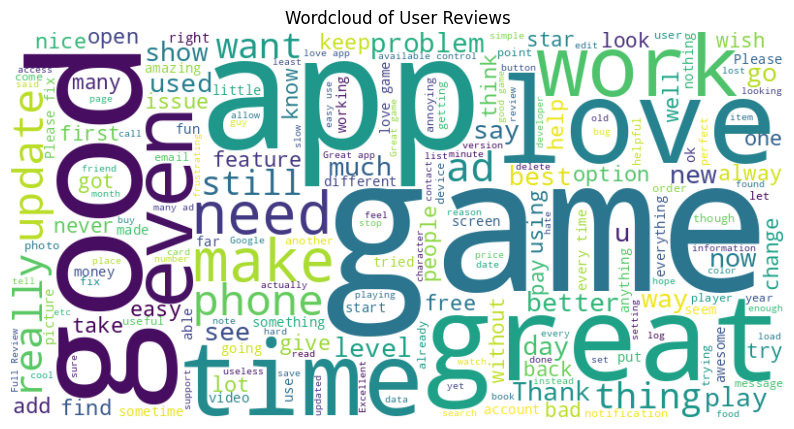

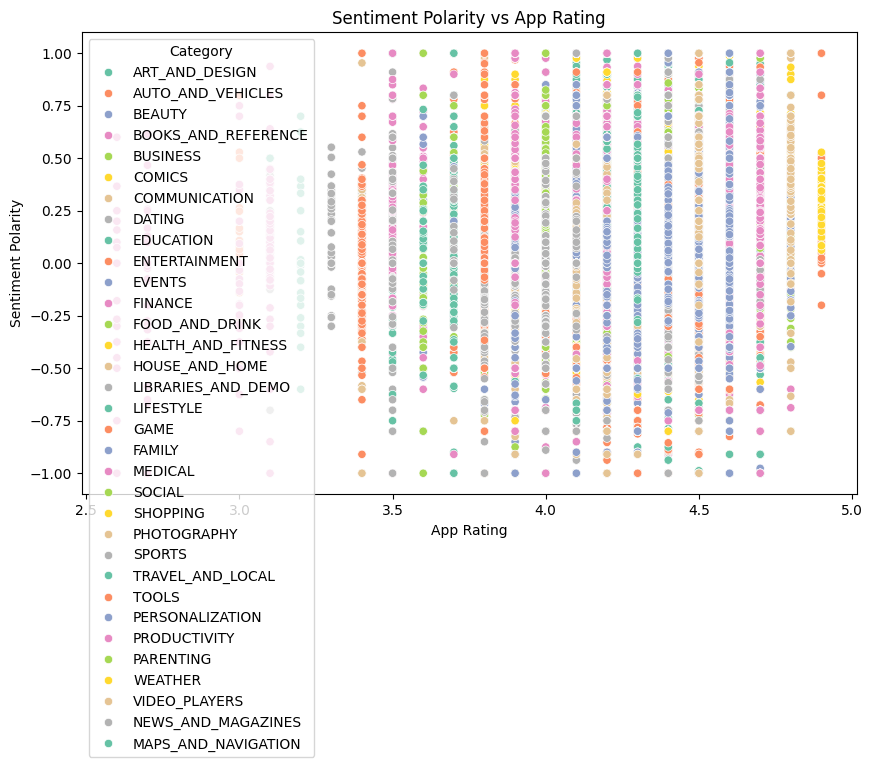

Analysis Completed! We've explored the Android App market, app categories, app ratings, pricing trends, and user sentiment from reviews.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import files

uploaded = files.upload()

apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')

apps_df.columns = apps_df.columns.str.strip()
reviews_df.columns = reviews_df.columns.str.strip()

apps_df['Size'] = apps_df['Size'].replace('Varies with device', None)
apps_df['Size'] = apps_df['Size'].astype(str).replace('nan', '0')
apps_df['Size'] = apps_df['Size'].str.replace('M', 'e6').str.replace('k', 'e3').astype(float)
apps_df['Size'] = pd.to_numeric(apps_df['Size'], errors='coerce')
apps_df['Size'] = apps_df['Size'].fillna(0)

apps_df['Price'] = apps_df['Price'].replace('[\$,]', '', regex=True).astype(float)
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')
apps_df['Installs'] = apps_df['Installs'].replace('[\+,]', '', regex=True).astype(int)

apps_df['Rating'] = apps_df['Rating'].fillna(apps_df['Rating'].median())
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])

category_count = apps_df['Category'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=category_count.index, y=category_count.values, palette='viridis')
plt.title('Top 10 App Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(apps_df['Rating'], kde=True, color='blue', bins=20)
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

paid_apps = apps_df[apps_df['Price'] > 0]
plt.figure(figsize=(10,6))
sns.histplot(paid_apps['Price'], kde=True, color='green', bins=20)
plt.title('Price Distribution for Paid Apps')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x=apps_df['Installs'], y=apps_df['Rating'], hue=apps_df['Category'], palette='Set1')
plt.title('App Installs vs Ratings')
plt.xlabel('Number of Installs')
plt.ylabel('Ratings')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(reviews_df['Sentiment_Polarity'], kde=True, color='red', bins=20)
plt.title('Sentiment Polarity Distribution of Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

text = ' '.join(reviews_df['Translated_Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of User Reviews')
plt.show()

merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')

plt.figure(figsize=(10,6))
sns.scatterplot(x=merged_df['Rating'], y=merged_df['Sentiment_Polarity'], hue=merged_df['Category'], palette='Set2')
plt.title('Sentiment Polarity vs App Rating')
plt.xlabel('App Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

print("Analysis Completed! We've explored the Android App market, app categories, app ratings, pricing trends, and user sentiment from reviews.")